# Authored by
This notebook was authored by **Priyadarshini Tamilselvan**

In [1]:
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

In [2]:
data = pd.read_csv('Dataset/prediction_labels.csv')

In [3]:
data

,text,label,VADER,DISTILLBERT,ROBERTA,BertTweet,gpt2,FINBERT
0,"""@mattduss @chrislhayes if ISIS does gain a fo...",0,2,0,0,0,0,0
1,"""Sad news! 150 people shot, drowned in Yobe ri...",0,0,0,0,0,0,0
2,@StephenNolan they all served and died under t...,0,0,0,0,0,0,0
3,Rousey vs. Holm may be the biggest waste of a ...,0,0,0,0,1,0,0
4,@user Amy Schumer is the stereotypical 1st wor...,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
8739,The city experienced a complete blackout after...,0,0,0,0,0,0,0
8740,"After the power outage, the city experienced a...",0,0,0,0,0,0,0
8741,The unexpected blackout plunged the city into ...,0,0,0,0,0,0,0
8742,The company's sudden mobilization of resources...,0,0,0,0,0,0,0


In [4]:
def majority_voting(row, model_columns):
    model_predictions = [row[model] for model in model_columns]
    prediction_count = Counter(model_predictions)
    final_prediction = prediction_count.most_common(1)[0][0]
    return final_prediction

In [5]:
model_columns = ['VADER', 'DISTILLBERT', 'ROBERTA', 'BertTweet', 'gpt2', 'FINBERT']

data['Ensemble'] = data.apply(majority_voting, axis=1, model_columns=model_columns)

In [6]:
actual_labels = data['label']
predicted_labels = data['Ensemble']

cm = confusion_matrix(actual_labels, predicted_labels)

accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted')  # Weighted accounts for label imbalance
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[3178  135  177]
 [ 526 1111  510]
 [ 173  228 2706]]
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79


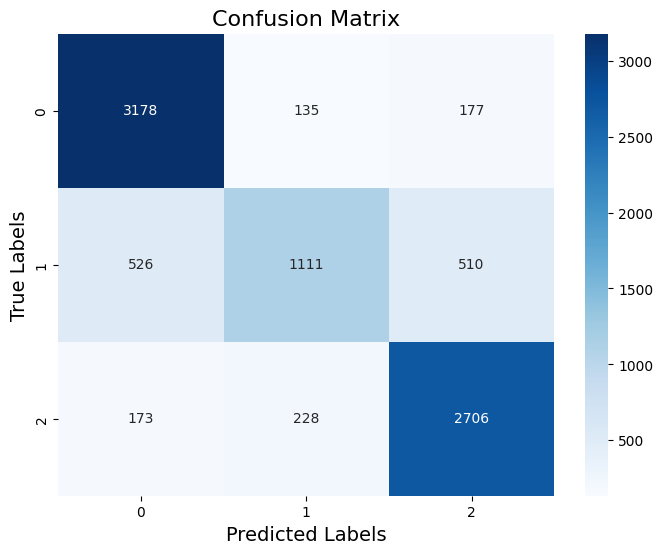

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels(actual_labels), yticklabels=unique_labels(actual_labels))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

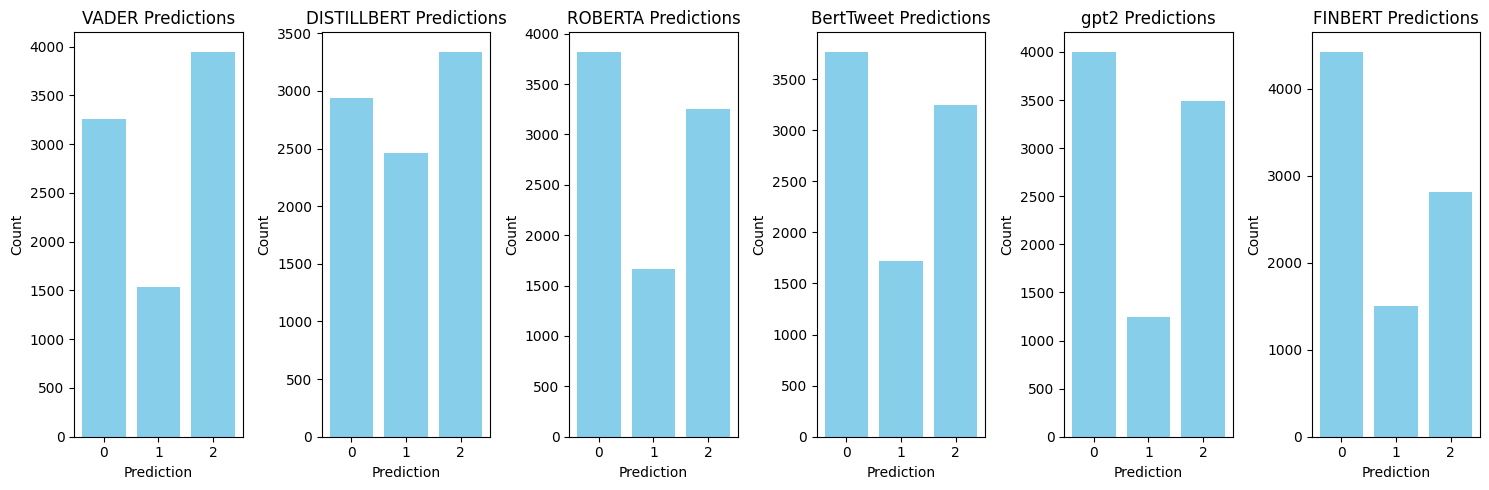

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=len(model_columns), figsize=(15, 5))

for idx, model in enumerate(model_columns):
    model_preds = data[model].value_counts()
    axes[idx].bar(model_preds.index, model_preds.values, color='skyblue')
    axes[idx].set_title(f'{model} Predictions')
    axes[idx].set_xlabel('Prediction')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

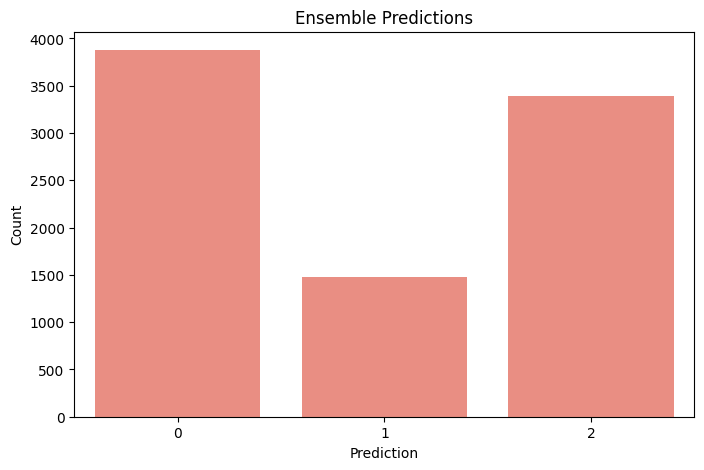

In [11]:
ensemble_predictions = data['Ensemble'].value_counts()

# Plotting the ensemble result
plt.figure(figsize=(8, 5))
sns.barplot(x=ensemble_predictions.index, y=ensemble_predictions.values, color='salmon')
plt.title('Ensemble Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()